<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1: Normalización Min-Max**

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:

**1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?**

    - No afecto la forma de la distribución de los datos, lo que se movió el rango de los valores.

**2. ¿Qué interpretas del p-valor antes y después de la normalización?**

    - Prueba de Shapiro-Wilk (Original): Estadístico = 0.9818, p-valor = 0.0200
    - Prueba de Shapiro-Wilk (Normalizado): Estadístico = 0.9818, p-valor = 0.0200

      Debido a que el p-valor en ambos casos es < 0.0500, podemos concluir que no sigue una distribución normal.
      Y como se mencionó, el p-valor no cambió después de la normalización de los datos, solo el rango de los valores.


   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
Prueba de Shapiro-Wilk (Original):
Estadístico = 0.9818, p-valor = 0.0200
Prueba de Shapiro-Wilk (Normalizado):
Estadístico = 0.9818, p-valor = 0.0200


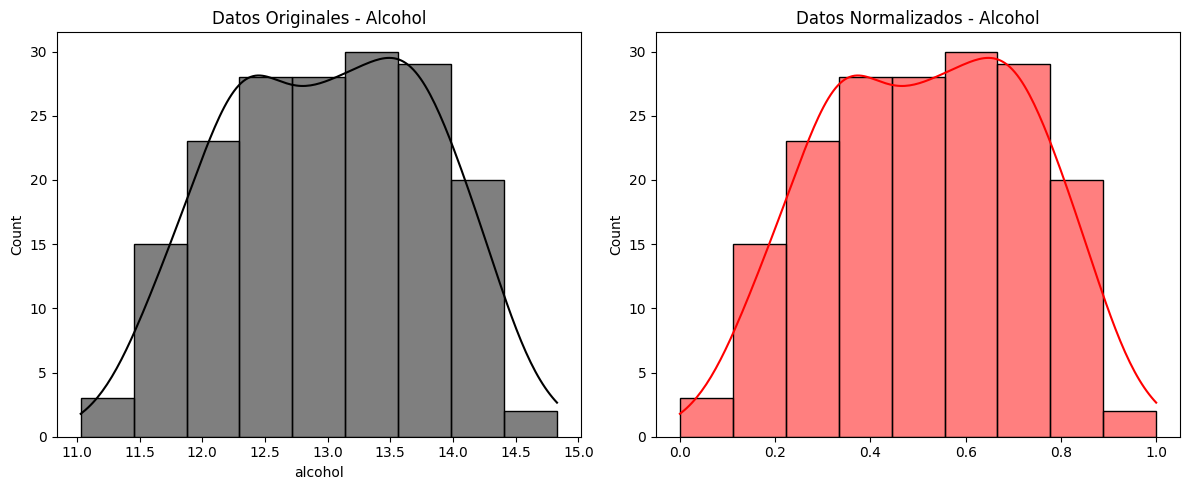

In [12]:
#===============================================================================
#                            IMPORTACIÓN DE LIBRERÍAS
#===============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, boxcox
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#===============================================================================
#                         CARGAR EL DATASET WINE DE SKLEARN
#===============================================================================

df = load_wine()
df_wine = pd.DataFrame(df.data, columns = df.feature_names)

print(df_wine.head())

#===============================================================================
#                        SELECCIONAR CARACTERÍSTICA NUMÉRICA
#===============================================================================

alcohol_data = df_wine['alcohol']

#===============================================================================
#              PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS ORIGINALES)
#===============================================================================

stat_original, p_original = shapiro(alcohol_data)

print(f"Prueba de Shapiro-Wilk (Original):\nEstadístico = {stat_original:.4f}, p-valor = {p_original:.4f}")

#===============================================================================
#                             NORMALIZACIÓN MIN-MAX
#===============================================================================

scaler = MinMaxScaler()
alcohol_minmax = scaler.fit_transform(alcohol_data.values.reshape(-1, 1)).flatten()

#===============================================================================
#             PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS NORMALIZADOS)
#===============================================================================

stat_normalizado, p_normalizado = shapiro(alcohol_minmax)

print(f"Prueba de Shapiro-Wilk (Normalizado):\nEstadístico = {stat_normalizado:.4f}, p-valor = {p_normalizado:.4f}")

#===============================================================================
#         VISUALIZACIÓN: GRÁFICAS (DATOS ORIGINALES Y NORMALIZADOS)
#===============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(alcohol_data, kde = True, color = 'black')
plt.title('Datos Originales - Alcohol')

plt.subplot(1, 2, 2)
sns.histplot(alcohol_minmax, kde = True, color = 'red')
plt.title('Datos Normalizados - Alcohol')

plt.tight_layout()
plt.show()


# **Ejercicio 2: Normalización Z-Score**

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:

**1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

    - De igual forma que el ejercicio #1, no cambia la distribución de los datos, solo el rango de los valores. También se puede observar que el p-valor sigue siendo el mismo después de la normalización.

**2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**

    - No garantiza que los datos se normalicen, pero estandariza la escala.
    - Este análisis permite comparar variables con diferentes escalas en un solo análisis.



Prueba de Shapiro-Wilk (Original - Malic Acid):
Estadístico = 0.8888, p-valor = 0.0000
Prueba de Shapiro-Wilk (Normalizado - Malic Acid):
Estadístico = 0.8888, p-valor = 0.0000


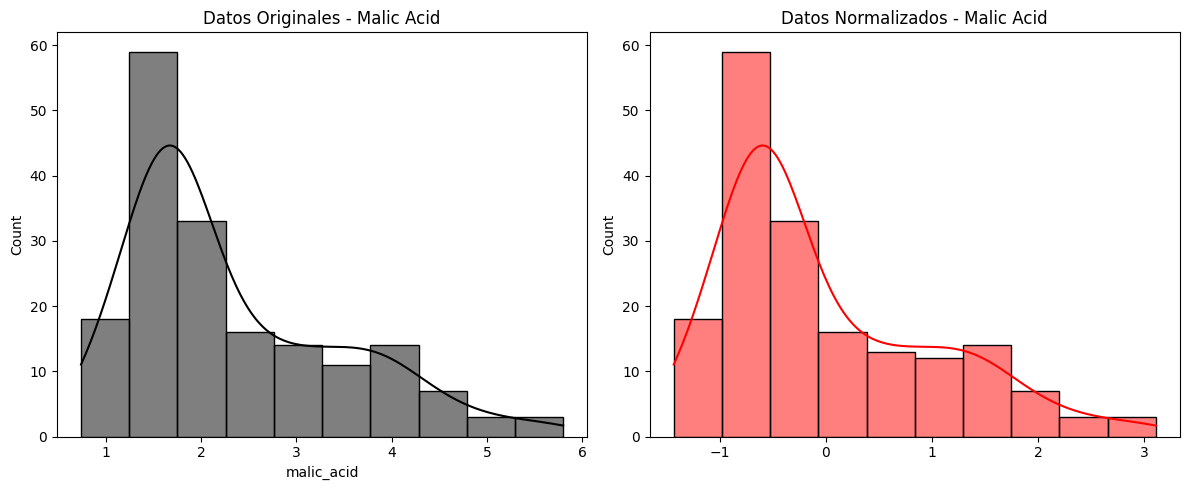

In [13]:
#===============================================================================
#                        SELECCIONAR CARACTERÍSTICA NUMÉRICA
#===============================================================================

malic_acid_data = df_wine['malic_acid']

#===============================================================================
#              PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS ORIGINALES)
#===============================================================================

stat_original_malic, p_original_malic = shapiro(malic_acid_data)

print(f"Prueba de Shapiro-Wilk (Original - Malic Acid):\nEstadístico = {stat_original_malic:.4f}, p-valor = {p_original_malic:.4f}")

#===============================================================================
#                             NORMALIZACIÓN Z-SCORE
#===============================================================================

scaler_zscore = StandardScaler()
malic_acid_zscore = scaler_zscore.fit_transform(malic_acid_data.values.reshape(-1, 1)).flatten()

#===============================================================================
#        PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS NORMALIZADOS - ZSCORE)
#===============================================================================

stat_normalizado_malic, p_normalizado_malic = shapiro(malic_acid_zscore)

print(f"Prueba de Shapiro-Wilk (Normalizado - Malic Acid):\nEstadístico = {stat_normalizado_malic:.4f}, p-valor = {p_normalizado_malic:.4f}")

#===============================================================================
#           VISUALIZACIÓN: GRÁFICAS (DATOS ORIGINALES Y NORMALIZADOS)
#===============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(malic_acid_data, kde = True, color = 'black')
plt.title('Datos Originales - Malic Acid')

plt.subplot(1, 2, 2)
sns.histplot(malic_acid_zscore, kde = True, color = 'red')
plt.title('Datos Normalizados - Malic Acid')

plt.tight_layout()
plt.show()


# **Ejercicio 3: Transformación Logarítmica**

Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

**1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

    - Se puede observar una mejora en la distribución de los datos. Sin embargo, no fue suficiente para que siguieran una distribución normal, y de la misma forma que los ejercicios anteriores, el p-valor es < 0.0500.

**2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

    - El p-valor antes y después de la transformación logarítmica es 0.0000. Esto indica que los datos no siguen una distribución normal.



Prueba de Shapiro-Wilk (Original - Log):
Estadístico = 0.8050, p-valor = 0.0000
Prueba de Shapiro-Wilk (Transformado - Log):
Estadístico = 0.9500, p-valor = 0.0000


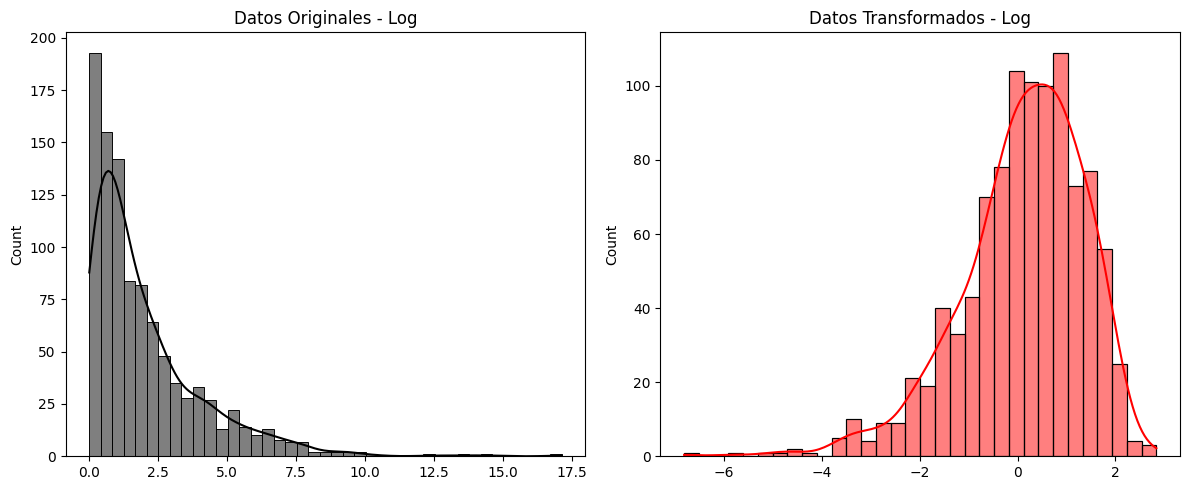

In [14]:
#===============================================================================
#                      GENERAR DATOS ALEATORIOS POSITIVOS
#===============================================================================

np.random.seed(0)
data = np.random.exponential(scale = 2.0, size = 1000)

#===============================================================================
#              PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS ORIGINALES)
#===============================================================================

stat_original_log, p_original_log = shapiro(data)

print(f"Prueba de Shapiro-Wilk (Original - Log):\nEstadístico = {stat_original_log:.4f}, p-valor = {p_original_log:.4f}")

#===============================================================================
#                             TRANSFORMACIÓN LOGARÍTMICA
#===============================================================================

log_data = np.log(data)

#===============================================================================
#            PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS TRANSFORMADOS)
#===============================================================================

stat_norm_log, p_norm_log = shapiro(log_data)

print(f"Prueba de Shapiro-Wilk (Transformado - Log):\nEstadístico = {stat_norm_log:.4f}, p-valor = {p_norm_log:.4f}")

#===============================================================================
#           VISUALIZACIÓN: GRÁFICAS (DATOS ORIGINALES Y NORMALIZADOS)
#===============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data, kde = True, color = 'black')
plt.title('Datos Originales - Log')

plt.subplot(1, 2, 2)
sns.histplot(log_data, kde = True, color = 'red')
plt.title('Datos Transformados - Log')

plt.tight_layout()
plt.show()


# **Ejercicio 4: Transformación Raíz Cuadrada**

Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

**1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**

    - De igual forma que el ejercicio #3, se observa una mejora en la distribución de los datos. Sin embargo, no se normalizaron los datos. Ambos p-valor antes y después de la tranformación, al igual que los ejercicios anteriores son < 0.0500, por lo que se infiere que no sigue una distribución normal, aunque haya mejorado la distribución con la tranformación, no fue suficiente para que siguieran una distribución normal

**2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**

    - La raíz cuadrada reduce el impacto de los valores extremos, tal y como se observa en el cambio en el estadístico de la prueba Shapiro-Wilk.



Prueba de Shapiro-Wilk (Original - Sqrt):
Estadístico = 0.8050, p-valor = 0.0000
Prueba de Shapiro-Wilk (Transformado - Sqrt):
Estadístico = 0.9655, p-valor = 0.0000


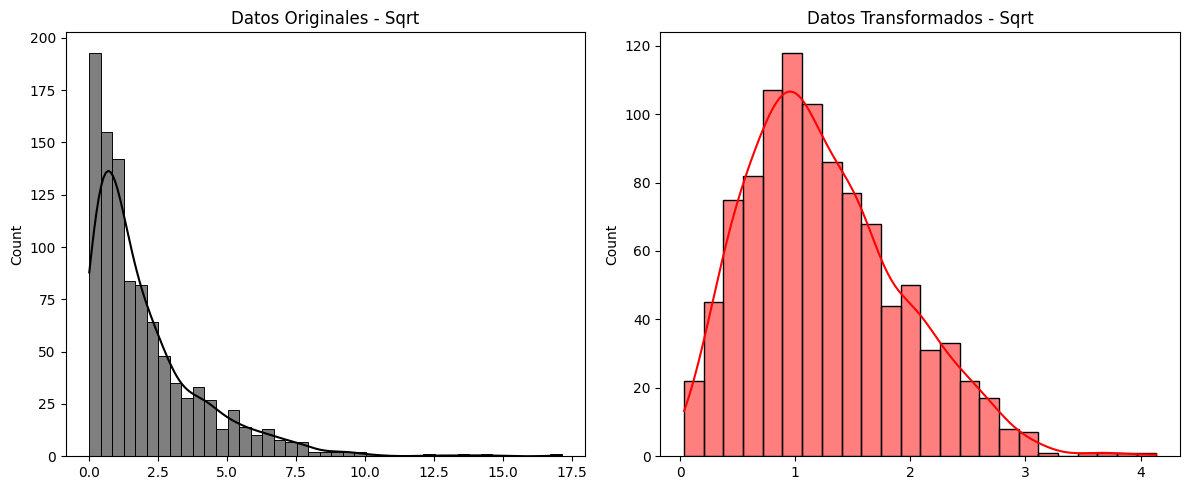

In [15]:
#===============================================================================
#                      GENERAR DATOS ALEATORIOS POSITIVOS
#===============================================================================

np.random.seed(0)
data_sqrt = np.random.exponential(scale = 2.0, size = 1000)

#===============================================================================
#              PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS ORIGINALES)
#===============================================================================

stat_original_sqrt, p_original_sqrt = shapiro(data_sqrt)

print(f"Prueba de Shapiro-Wilk (Original - Sqrt):\nEstadístico = {stat_original_sqrt:.4f}, p-valor = {p_original_sqrt:.4f}")

#===============================================================================
#                       TRANSFORMACIÓN RAÍZ CUADRADA
#===============================================================================

sqrt_data = np.sqrt(data_sqrt)

#===============================================================================
#            PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS TRANSFORMADOS)
#===============================================================================

stat_norm_sqrt, p_norm_sqrt = shapiro(sqrt_data)

print(f"Prueba de Shapiro-Wilk (Transformado - Sqrt):\nEstadístico = {stat_norm_sqrt:.4f}, p-valor = {p_norm_sqrt:.4f}")

#===============================================================================
#           VISUALIZACIÓN: GRÁFICAS (DATOS ORIGINALES Y NORMALIZADOS)
#===============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_sqrt, kde = True, color = 'black')
plt.title('Datos Originales - Sqrt')

plt.subplot(1, 2, 2)
sns.histplot(sqrt_data, kde = True, color = 'red')
plt.title('Datos Transformados - Sqrt')

plt.tight_layout()
plt.show()


# **Ejercicio 5: Transformación Box-Cox**

Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

**1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

    - La transformación Box-Cox logró que los datos tuvieran una distribución normal. A diferencia de los ejercicios anteriores el p-valor = 0.2908 > 0.0500 y antes de la transformación el p-valor = 0.0000 < 0.0500. Por lo que podemos inferir que la transformación normalizo los datos.

**2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**

    - El valor Lambda en la transformación Box-Cox es: 0.2420.
    - Este valor sugiere que la tranformación aplicada fue una mezcla de raíz cuadrada y logarítmica.
    - El valor Lambda determina la naturaleza de la transformación, ayudando a encontrar la mejor transformación para acercar los datos a una distribución normal.


Prueba de Shapiro-Wilk (Original - Box-Cox):
Estadístico = 0.8050, p-valor = 0.0000
Prueba de Shapiro-Wilk (Transformado - Box-Cox):
Estadístico = 0.9980, p-valor = 0.2908


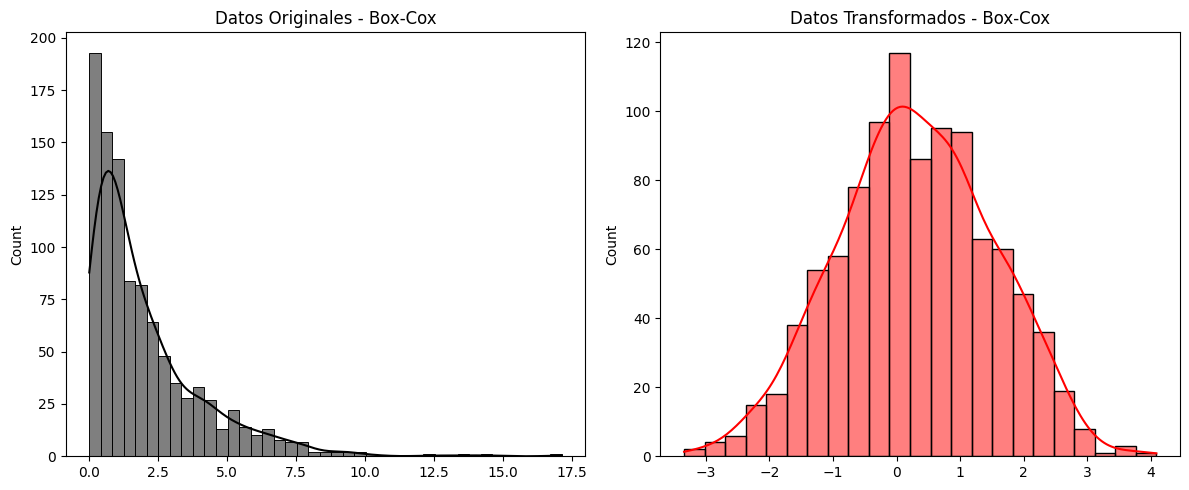


El valor de Lambda en la transformación de Box-Cox: 0.2420


In [16]:
#===============================================================================
#                      GENERAR DATOS ALEATORIOS POSITIVOS
#===============================================================================

np.random.seed(0)
data_boxcox = np.random.exponential(scale = 2.0, size = 1000)

#===============================================================================
#              PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS ORIGINALES)
#===============================================================================

stat_original_boxcox, p_original_boxcox = shapiro(data_boxcox)

print(f"Prueba de Shapiro-Wilk (Original - Box-Cox):\nEstadístico = {stat_original_boxcox:.4f}, p-valor = {p_original_boxcox:.4f}")

#===============================================================================
#                       TRANSFORMACIÓN BOX-COX
#===============================================================================

boxcox_data, lambda_boxcox = boxcox(data_boxcox)

#===============================================================================
#            PRUEBA DE NORMALIDAD SHAPIRO-WILK (DATOS TRANSFORMADOS)
#===============================================================================

stat_norm_boxcox, p_norm_boxcox = shapiro(boxcox_data)

print(f"Prueba de Shapiro-Wilk (Transformado - Box-Cox):\nEstadístico = {stat_norm_boxcox:.4f}, p-valor = {p_norm_boxcox:.4f}")

#===============================================================================
#           VISUALIZACIÓN: GRÁFICAS (DATOS ORIGINALES Y NORMALIZADOS)
#===============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_boxcox, kde = True, color = 'black')
plt.title('Datos Originales - Box-Cox')

plt.subplot(1, 2, 2)
sns.histplot(boxcox_data, kde = True, color = 'red')
plt.title('Datos Transformados - Box-Cox')

plt.tight_layout()
plt.show()

print(f"\nEl valor de Lambda en la transformación de Box-Cox: {lambda_boxcox:.4f}")
